In [1]:
import pickle
import pandas as pd
import seaborn as sns            # Еще один пакет для графиков
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('ggplot')          # задаём красивый стиль для графиков matplotlib-а
%matplotlib inline

In [2]:
with open(r'C:\Users\savintseva\_University\parsing\LDA\test\ldamodel_topics_15.pickle', 'rb') as f:
    topics_15 = pickle.load(f)

In [3]:
topics_15

[(0,
  [('писать', 0.057100132),
   ('вопрос', 0.039911855),
   ('иметь', 0.037980903),
   ('русский', 0.035350557),
   ('правильно', 0.024229769),
   ('решить', 0.022743056),
   ('россиянин', 0.01780708),
   ('человек', 0.015912909),
   ('лично', 0.015583159),
   ('смысл', 0.0153518235),
   ('умный', 0.013535937),
   ('отношение', 0.013462842),
   ('общество', 0.012903866),
   ('суд', 0.012865734),
   ('норма', 0.012828906),
   ('ехать', 0.012216566),
   ('половина', 0.011976734),
   ('слышать', 0.011955284),
   ('крым', 0.01194507),
   ('экономика', 0.01160007),
   ('мочь', 0.011135354),
   ('американец', 0.010887368),
   ('система', 0.010842749),
   ('бабушка', 0.010148196),
   ('продать', 0.009818512),
   ('ум', 0.009772384),
   ('х', 0.009719695),
   ('быдло', 0.009592025),
   ('жопа', 0.0095593035),
   ('дело', 0.009453348),
   ('улица', 0.008827378),
   ('хохол', 0.008779045),
   ('приехать', 0.0082848),
   ('реальный', 0.007852086),
   ('называться', 0.007846087),
   ('устраива

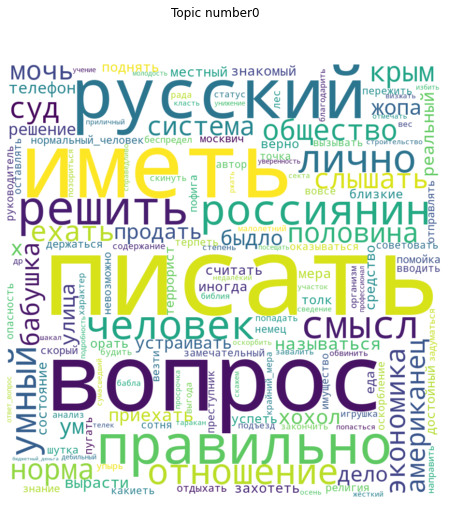

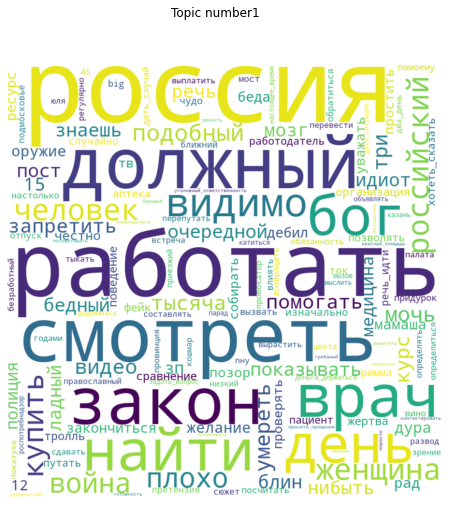

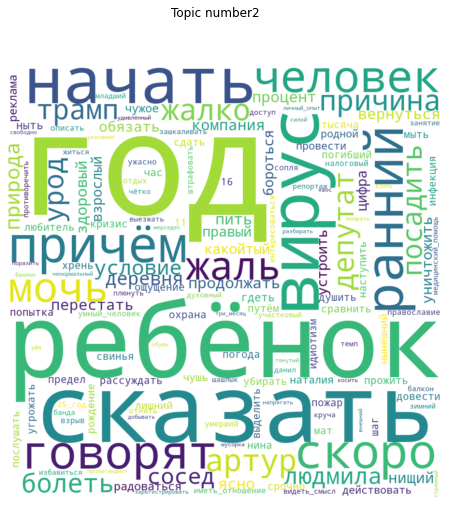

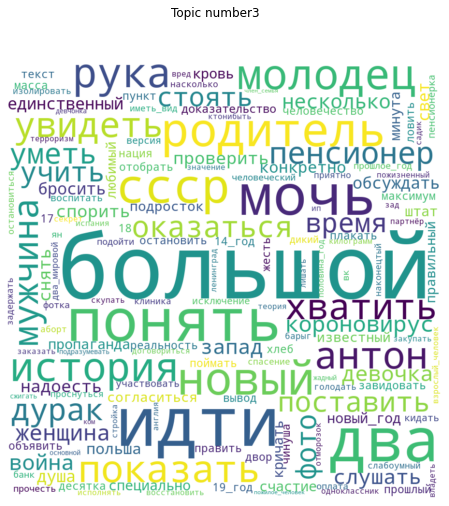

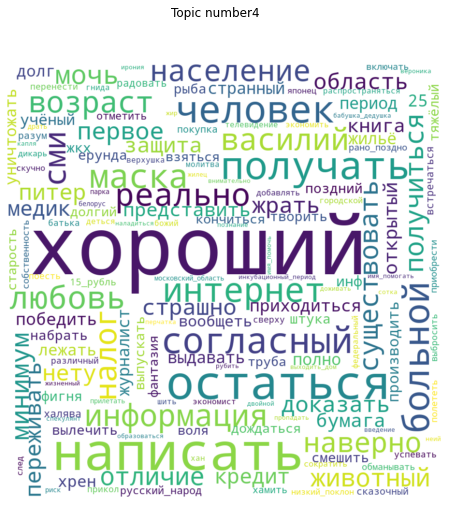

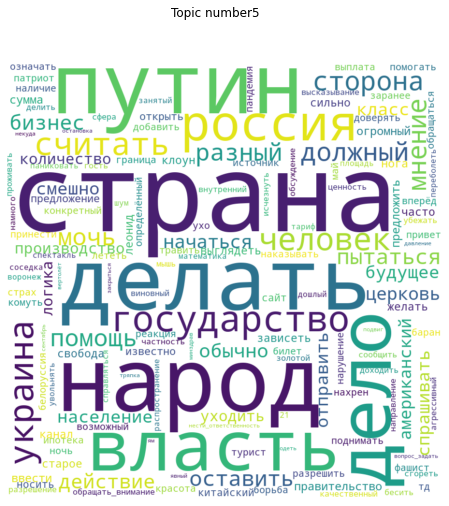

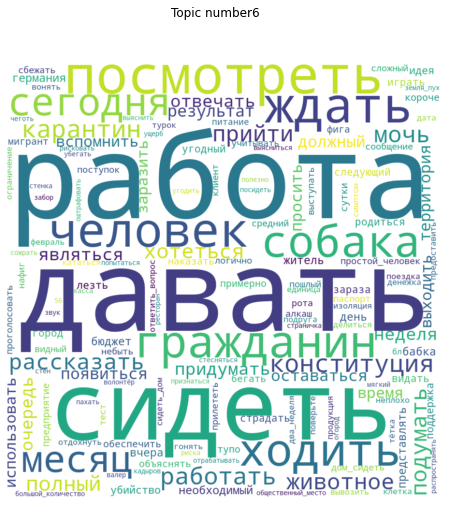

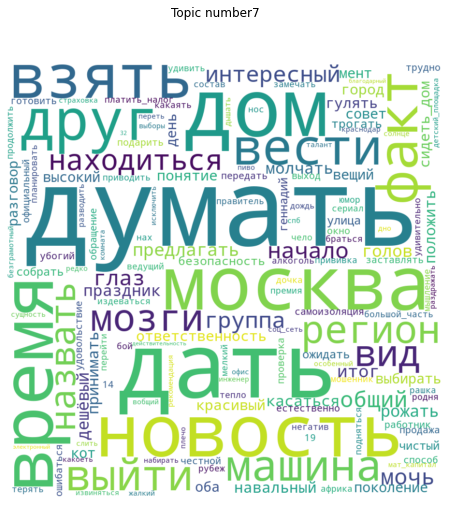

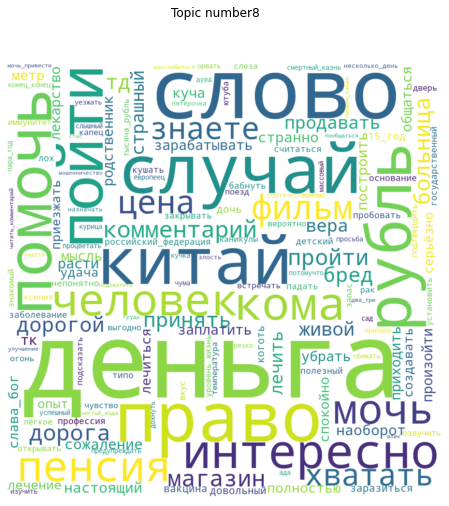

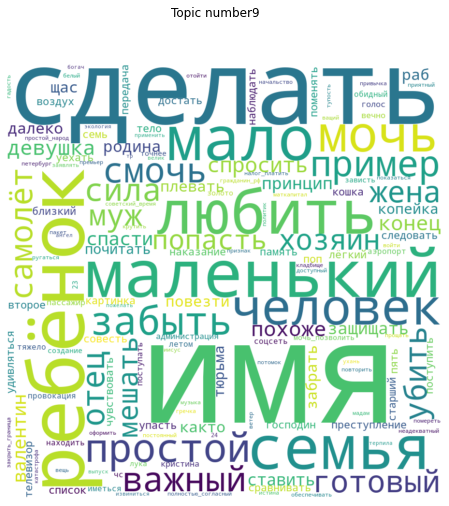

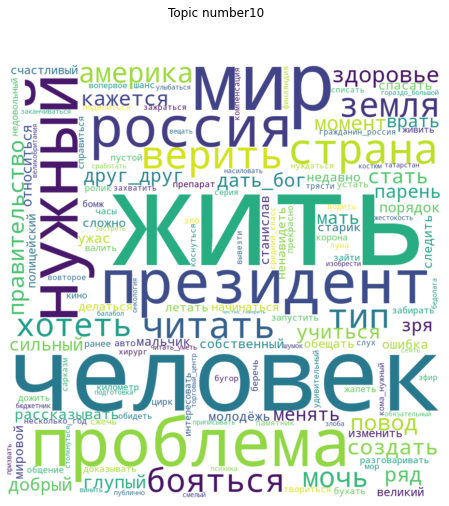

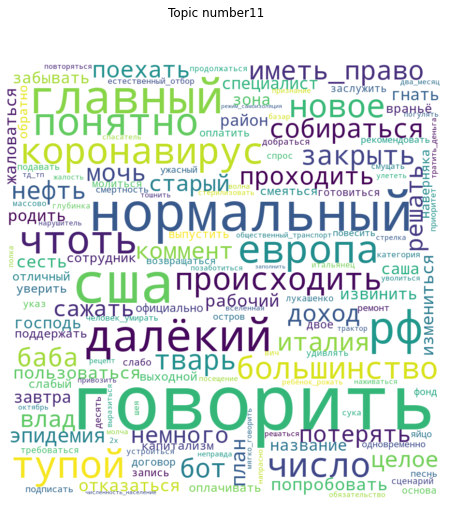

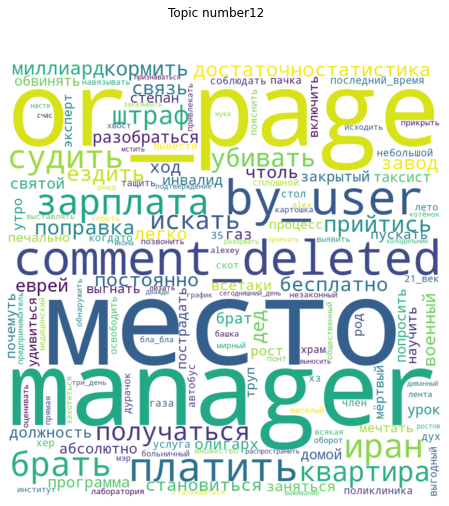

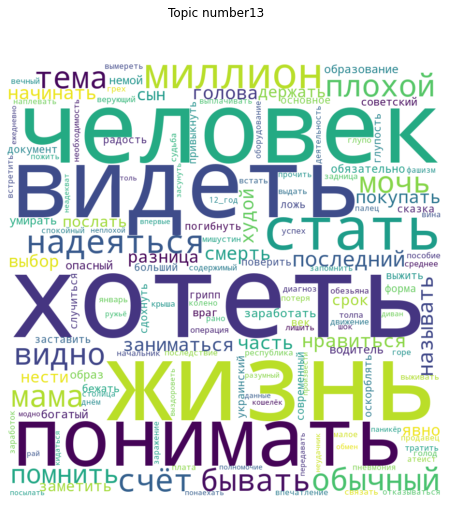

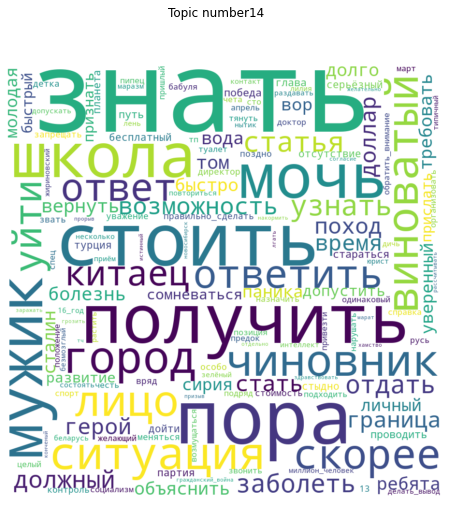

In [15]:
def plotWordCloud(topic_number):
    """
        Строит визуализацию слов на основе текстов топиков
    """
    # ОБЯЗАТЕЛЬНО ПОСТАВИТЬ ИМЯ ПЕРЕМЕННОЙ, ИЗ КОТОРОЙ БЕРЕМ ТЕМЫ
    text = dict(topics_15[topic_number][1])
    
    # строим облако слов
    wordcloud = WordCloud(background_color="white", max_words=150, width=900, height=900, collocations=True)
    wordcloud = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10, 8))
    plt.suptitle('Topic number{}'.format(topic_number))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
for i in range(0, 15):
    plotWordCloud(topic_number=i)

In [34]:
themes_15 = {
    0: 'ситуация в стране',
    1: 'удаленные комментарии или спам',
    2: 'повседневная жизнедеятельность',
    3: 'россия',
    4: 'коронавирус',
    5: 'китай',
    6: 'дети и семья',
    7: 'украина и россия',
    8: 'медицина',
    9: 'государство и граждане',
    10: 'выражение мнения',
    11: 'проблемы человека',
    12: 'образование',
    13: 'путин',
    14: 'нужды населения',
}

In [28]:
# Для LATINA LDA 15
themes_15 = {
    0: 'демократия',
    1: 'венесуэла и россия',
    2: 'революционные настроения',
    3: 'правительство',
    4: 'воровство и терроризм',
    5: 'президент',
    6: 'проблемы людей',
    7: 'освобождение',
    8: 'ложь и предательство',
    9: 'ожидания',
    10: 'ситуация в мире',
    11: 'базовые нужды',
    12: 'сша и латинская америка',
    13: 'коммунисты и диктатура',
    14: 'трамп'
}

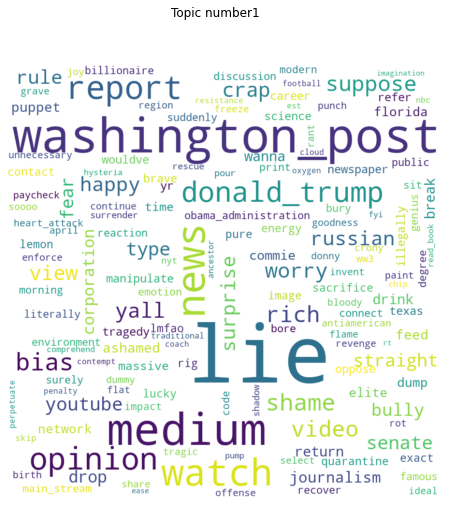

In [6]:
plotWordCloud(topic_number=1)

In [61]:
themes_14 = {
    0: 'общественные вопросы',
    1: 'россия',
    2: 'мир и коронавирус',
    3: 'система образования',
    4: 'удаленные комментарии/спам',
    5: 'путин и страна',
    6: 'дети и семья',
    7: 'нужды населения',
    8: 'власть и народ',
    9: 'повседневная жизнь',
    10: 'мнение человека',
    11: 'мир и финансы',
    12: 'украина',
    13: 'выражение мнения'
}

In [31]:
# Строим тематические профили

def topicProfileGenre(model, country, dataset, corpus, typeof=True):
    theme_results = [ ]
    # Количество топиков
    r = model.num_topics
    
    # Выбираем из таблицы те строки, которые соовтетствуют текущему типу (или группе)
    if typeof:
        num = dataset[dataset['country'] == country].index
    else:
        num = dataset[dataset['channel'] == country].index

    # Вектор для тематического профиля жанра
    theme_profile = np.zeros(r)
    err = 0 # Для записи ошибок

    # Пробежимся по всем любителям текущего типа/группы
    for i in num:
        try:
            # вытаскиваем тематический профиль текущего юзера
            cur_user_prof = model.get_document_topics(corpus[i])

            # сортируем по номерам тем
            cur_user_prof = sorted(cur_user_prof, key=lambda w: w[0], reverse=True)      

            ind = [cup[0] for cup in cur_user_prof]     # делаем вектор с номерами тем
            prob = np.array([cup[1] for cup in cur_user_prof]) # делаем вектор с весами  
            theme_profile[ind] += prob        # Увеличиваем соответствующие веса
        except:
            err += 1 # Если возникла ошибка, значит профиль битый 

    # Нормируем к единице
    #print('Доля битых профилей для {}:'.format(music_style), err/len(num))
    theme_profile = theme_profile / np.sum(theme_profile)
    theme_profile = list(zip(range(30),theme_profile))
    return theme_profile

def profilePlot(theme_profile, country, themes=themes_15):
    """
    Строит тематическией профиль для каждого жанра
    theme_profile:
        тематический профиль, dict
    news_type: 
        Тип новостей
    themes dict:
        названия тем
    """
    
    theme_profile = theme_profile[country]
    sorted_prof = sorted(theme_profile, key=lambda w: w[1], reverse=True)   
    
    # рисуем картинку
    sns.set(font_scale=2)
    plt.subplots(figsize=(20, 40))
    
    prof = np.array([pr[1] for pr in sorted_prof]).reshape(1,-1)
    them = [themes[pr[0]] for pr in sorted_prof]
    
    ax = plt.axes()    
    sns.heatmap(prof, ax = ax, square=True, annot=True, fmt=".2f", linewidths=0.1, 
                 cmap="YlGnBu", cbar=False, yticklabels='', xticklabels=them )
    ax.set_title('Тематический профиль для {}: \n'.format(news_type))
    plt.show()

In [30]:
reduced_data = pd.read_csv(r'C:\Users\savintseva\_University\parsing\youtube comments\america latina\comments_al\reduced\reduced_comments.csv', encoding='utf-8')

In [152]:
channel_themes = { }
for channel in tqdm_notebook(reduced_data.group.unique()):
    
    # Выделяем темы для текущего жанра
    theme = topicProfileGenre(ldamodel_20, group, reduced_data, corpus, typeof=False)
    
    # Записываем их в словарик:
    group_themes[group] = theme

# print(group_themes)

In [32]:
for channel in reduced_data.channel.unique():
    profilePlot(group_themes, channel)

AttributeError: 'DataFrame' object has no attribute 'group'